In [4]:
#importação de pacotes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
import yfinance as yf

In [5]:
#importando os dados(apenas dos dados dos fechamentos)

tickers = ['^bvsp','usdbrl=x','abev3.sa','b3sa3.sa']
carteira = web.get_data_yahoo(tickers, start = '2016-01-01')['Close']

In [6]:
carteira

Symbols,^bvsp,usdbrl=x,abev3.sa,b3sa3.sa
Date,,,,
2016-01-01,NaN,3.950000,NaN,NaN
2016-01-04,42141.000000,3.949100,17.209999,10.450000
2016-01-05,42419.000000,4.037300,17.480000,10.850000
2016-01-06,41773.000000,4.026900,17.309999,10.840000
2016-01-07,40695.000000,4.019900,16.850000,10.390000
...,...,...,...,...
2021-01-08,125199.000000,5.408800,16.639999,63.270000
2021-01-11,122807.000000,5.412188,16.100000,60.110001
2021-01-12,123998.000000,5.487700,16.799999,61.849998


In [7]:
#mudar os nomes das colunas

carteira.columns=['ibov','dolar','ambev','b3']
carteira.head()

,ibov,dolar,ambev,b3
Date,,,,
2016-01-01,NaN,3.9500,NaN,NaN
2016-01-04,42141.0,3.9491,17.209999,10.45
2016-01-05,42419.0,4.0373,17.480000,10.85
2016-01-06,41773.0,4.0269,17.309999,10.84
2016-01-07,40695.0,4.0199,16.850000,10.39


In [8]:
# quantidades de dados missing

carteira.isnull().sum()

ibov     212
dolar    164
ambev    206
b3       206
dtype: int64

In [9]:
# adicionando valores aos dados missing

carteira['ibov'].fillna(carteira['ibov'].median(), inplace = True)
carteira['dolar'].fillna(carteira['dolar'].median(), inplace = True)
carteira['ambev'].fillna(carteira['ambev'].median(), inplace = True)
carteira['b3'].fillna(carteira['b3'].median(), inplace = True)

In [10]:
carteira.isna().sum()

ibov     0
dolar    0
ambev    0
b3       0
dtype: int64

In [11]:
carteira.head()

,ibov,dolar,ambev,b3
Date,,,,
2016-01-01,79457.5,3.9500,18.285001,24.605
2016-01-04,42141.0,3.9491,17.209999,10.450
2016-01-05,42419.0,4.0373,17.480000,10.850
2016-01-06,41773.0,4.0269,17.309999,10.840
2016-01-07,40695.0,4.0199,16.850000,10.390


<function matplotlib.pyplot.show(close=None, block=None)>

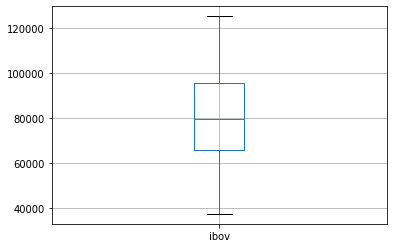

In [12]:
# Criando um grafico boxplot

carteira.boxplot('ibov')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

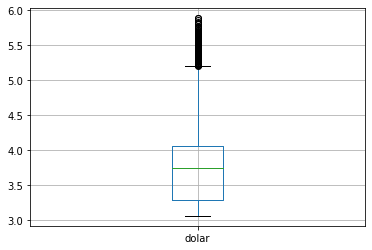

In [13]:
carteira.boxplot('dolar')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

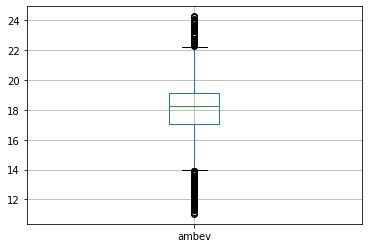

In [14]:
carteira.boxplot('ambev')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

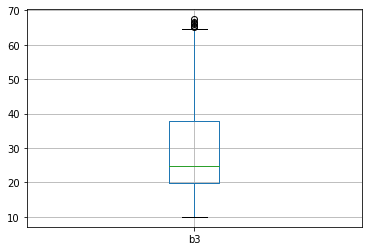

In [15]:
carteira.boxplot('b3')
plt.show

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

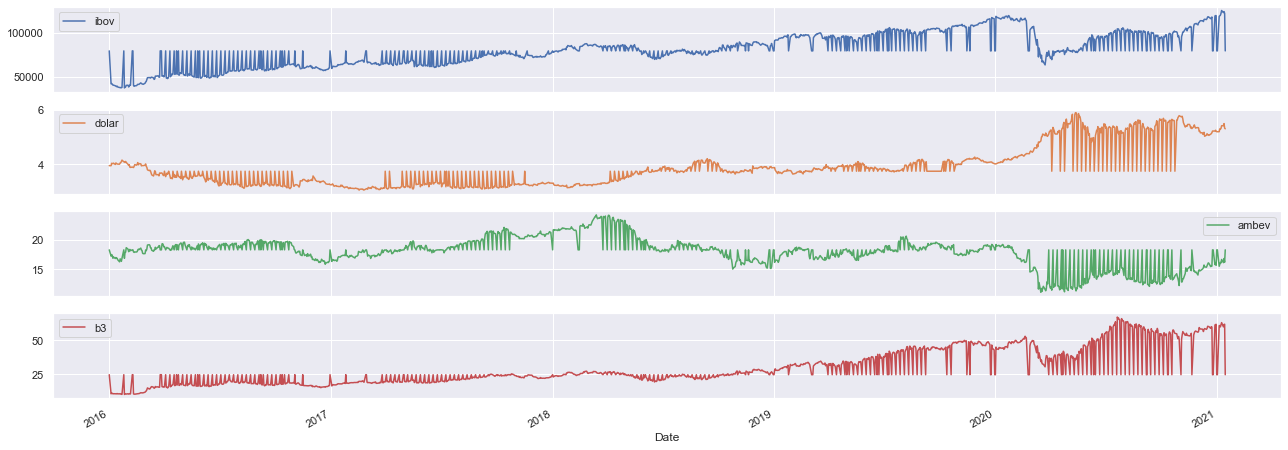

In [16]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))

In [17]:
carteira.corr()

,ibov,dolar,ambev,b3
ibov,1.00000,0.453960,-0.235810,0.864280
dolar,0.45396,1.000000,-0.664356,0.665849
ambev,-0.23581,-0.664356,1.000000,-0.532310
b3,0.86428,0.665849,-0.532310,1.000000


<AxesSubplot:>

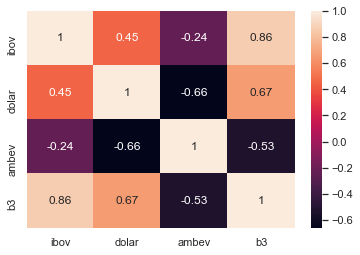

In [18]:
sns.heatmap(carteira.corr(),annot=True)

<AxesSubplot:xlabel='Date'>

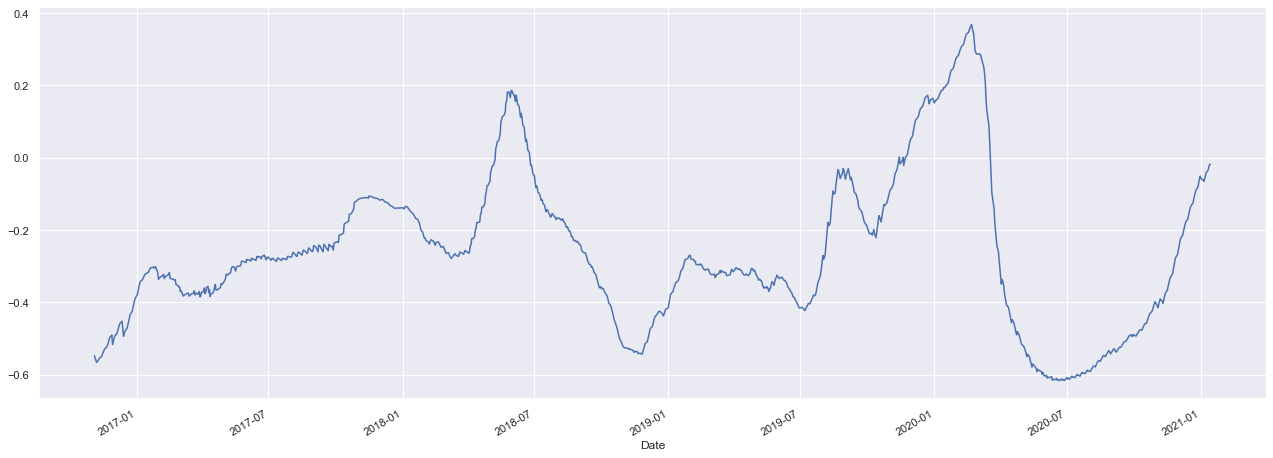

In [19]:
carteira['dolar'].rolling(252).corr(carteira['ibov']).plot(figsize=(22,8))

<AxesSubplot:xlabel='Date'>

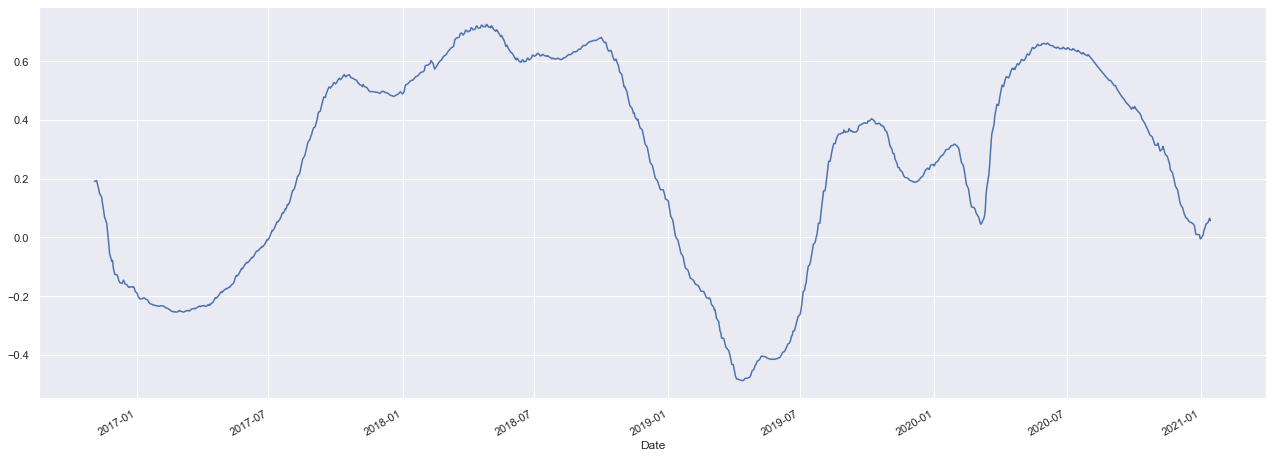

In [20]:
carteira['ambev'].rolling(252).corr(carteira['ibov']).plot(figsize=(22,8))

<AxesSubplot:xlabel='Date'>

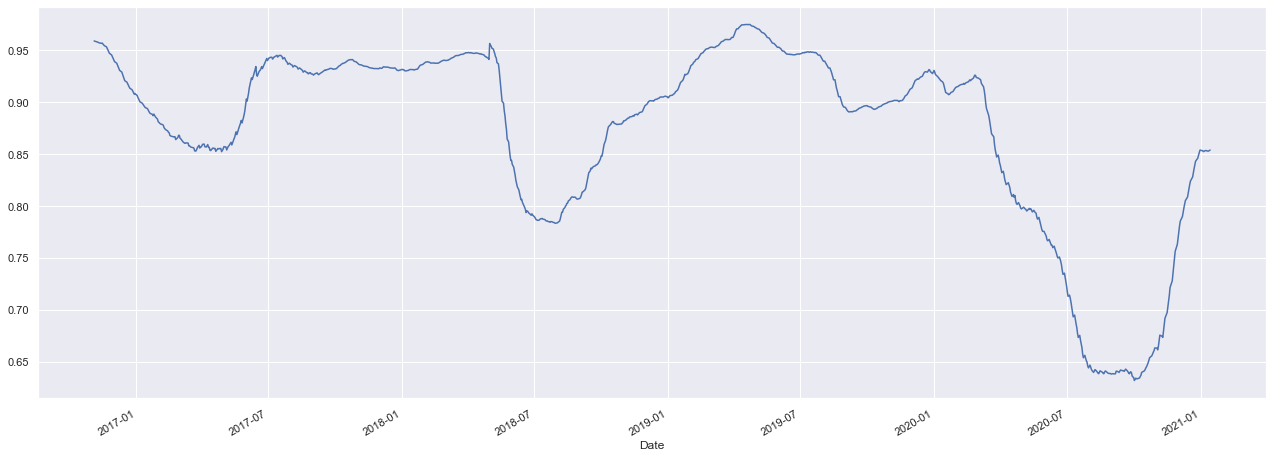

In [21]:
carteira['b3'].rolling(252).corr(carteira['ibov']).plot(figsize=(22,8))

<AxesSubplot:xlabel='Date'>

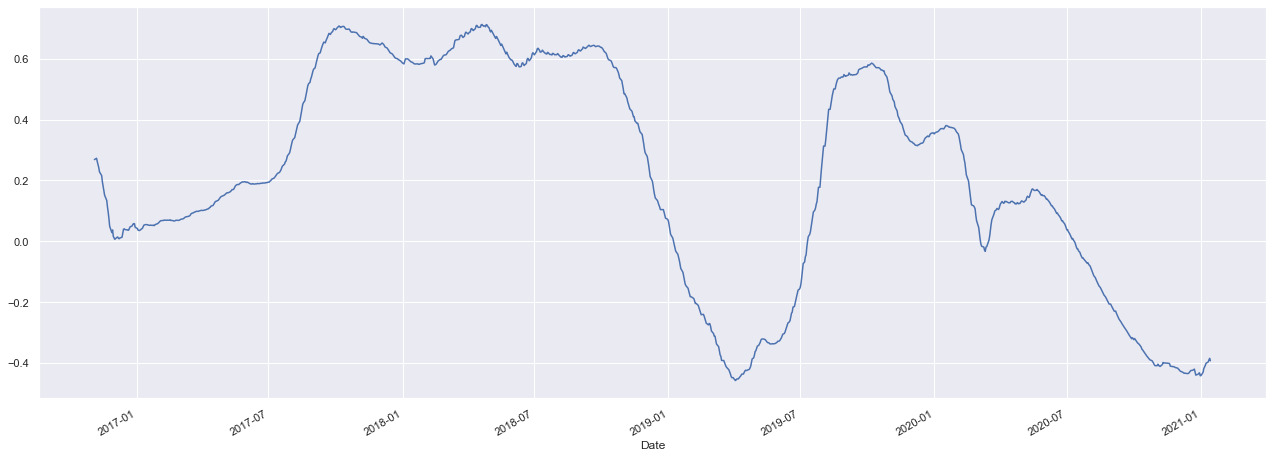

In [22]:
carteira['b3'].rolling(252).corr(carteira['ambev']).plot(figsize=(22,8))

In [23]:
## dados apenas da B3

b3carteira=carteira['b3']
b3carteira.head()

Date
2016-01-01    24.605
2016-01-04    10.450
2016-01-05    10.850
2016-01-06    10.840
2016-01-07    10.390
Name: b3, dtype: float64

In [24]:
b3carteira.tail()

Date
2021-01-08    63.270000
2021-01-11    60.110001
2021-01-12    61.849998
2021-01-13    62.099998
2021-01-14    24.605000
Name: b3, dtype: float64

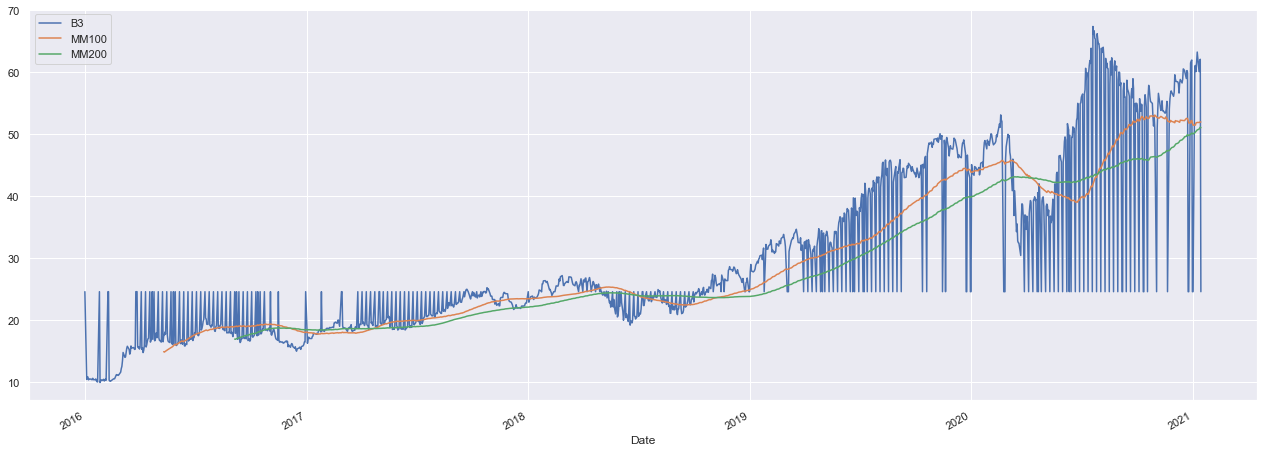

In [36]:
sns.set()
b3carteira.plot(figsize=(22,8), label='B3')
b3carteira.rolling(100).mean().plot(label = 'MM100')
b3carteira.rolling(200).mean().plot(label = 'MM200')
plt.legend()

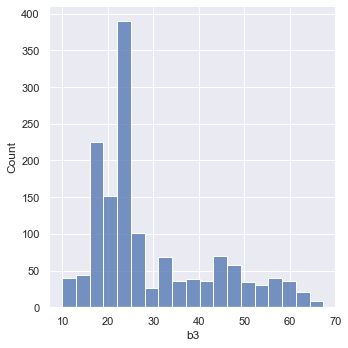

In [28]:
sns.displot(b3carteira);

In [29]:
# valor da media
b3carteira.mean()

29.623969858164315

In [30]:
#valor da mediana
b3carteira.median()

24.605000495910645

In [34]:
#valor da variancia 
v=np.var(b3carteira)
print('%.2f'%v)


177.54


In [35]:
#valor do desvio padrão 
dp=np.std(b3carteira)
print('%.2f'%dp)


13.32
